# Github csv data.

In [1]:
import subprocess
import os

import pandas as pd
import numpy as np
import requests

from datetime import datetime

from bs4 import BeautifulSoup


%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

![CRISP_DM](../reports/figures/CRISP_DM.png)

In [2]:
data_path= '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/5/20', '9/6/20', '9/7/20', '9/8/20', '9/9/20', '9/10/20', '9/11/20',
       '9/12/20', '9/13/20', '9/14/20'],
      dtype='object', length=237)

In [5]:
time_idx=pd_raw.columns[4:]

In [6]:
df_plot=pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
 pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [9]:
country_list=['Italy','US','India','Germany','China',]

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [11]:
df_plot

,date,Italy,US,India,Germany,China
0,1/22/20,0,1,0,0,548
1,1/23/20,0,1,0,0,643
2,1/24/20,0,2,0,0,920
3,1/25/20,0,2,0,0,1406
4,1/26/20,0,5,0,0,2075
...,...,...,...,...,...,...
232,9/10/20,283180,6396100,4562414,258149,90127
233,9/11/20,284796,6443652,4659984,259735,90145
234,9/12/20,286297,6485123,4754356,260817,90168
235,9/13/20,287753,6519573,4846427,261737,90197


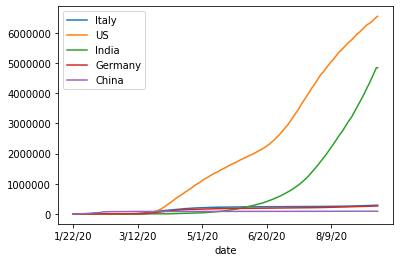

In [12]:
%matplotlib inline
df_plot.set_index('date').plot()

# DATA TYPE DATE

In [13]:
df_plot.head()

,date,Italy,US,India,Germany,China
0,1/22/20,0,1,0,0,548
1,1/23/20,0,1,0,0,643
2,1/24/20,0,2,0,0,920
3,1/25/20,0,2,0,0,1406
4,1/26/20,0,5,0,0,2075


In [14]:
from datetime import datetime

In [15]:
df_plot.date[0]

'1/22/20'

In [16]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]   #convert to datetime
time_idx[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [17]:
time_str=[each.strftime('%y-%m-%d') for each in time_idx] #convert back to str
time_str[0:5]

['20-01-22', '20-01-23', '20-01-24', '20-01-25', '20-01-26']

In [18]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
df_plot.head()

,date,Italy,US,India,Germany,China
0,2020-01-22,0,1,0,0,548
1,2020-01-23,0,1,0,0,643
2,2020-01-24,0,2,0,0,920
3,2020-01-25,0,2,0,0,1406
4,2020-01-26,0,5,0,0,2075


In [20]:
df_plot.to_csv('../data/processed//COVID_small_flat_table.csv',sep=';',index=False)

In [21]:
df_plot

,date,Italy,US,India,Germany,China
0,2020-01-22,0,1,0,0,548
1,2020-01-23,0,1,0,0,643
2,2020-01-24,0,2,0,0,920
3,2020-01-25,0,2,0,0,1406
4,2020-01-26,0,5,0,0,2075
...,...,...,...,...,...,...
232,2020-09-10,283180,6396100,4562414,258149,90127
233,2020-09-11,284796,6443652,4659984,259735,90145
234,2020-09-12,286297,6485123,4754356,260817,90168
235,2020-09-13,287753,6519573,4846427,261737,90197


# Another table with full country list

In [22]:
full_countrylist= pd_raw['Country/Region'].unique()

In [23]:
for each in full_countrylist:
    
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [24]:
df_plot['China']

0        548
1        643
2        920
3       1406
4       2075
       ...  
232    90127
233    90145
234    90168
235    90197
236    90219
Name: China, Length: 237, dtype: int64

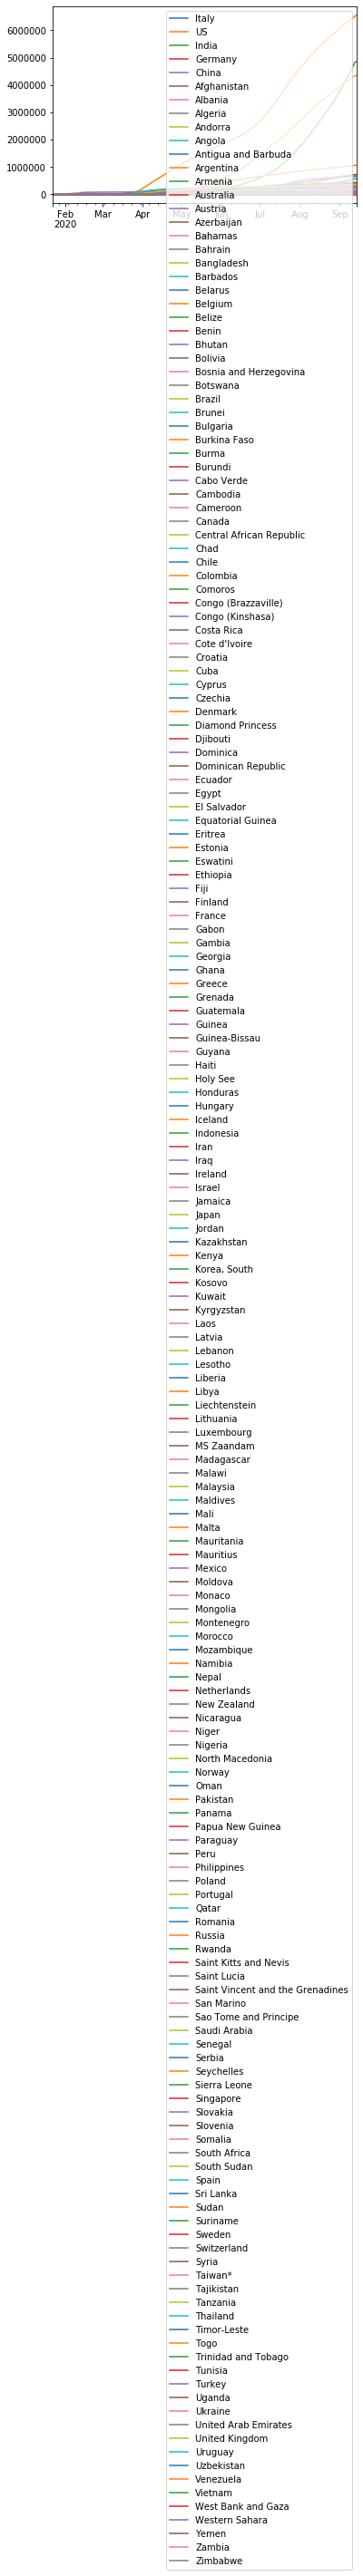

In [25]:
%matplotlib inline
df_plot.set_index('date').plot()

# DATA TYPE DATE

In [26]:
df_plot.head()

,date,Italy,US,India,Germany,China,Afghanistan,Albania,Algeria,Andorra,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,1,0,0,548,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,1,0,0,643,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,2,0,0,920,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,2,0,0,1406,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,5,0,0,2075,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [27]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
df_plot.to_csv('../data/processed//COVID_full_flat_table.csv',sep=';',index=False)

In [29]:
df_plot

,date,Italy,US,India,Germany,China,Afghanistan,Albania,Algeria,Andorra,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,1,0,0,548,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,1,0,0,643,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,2,0,0,920,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,2,0,0,1406,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,5,0,0,2075,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2020-09-10,283180,6396100,4562414,258149,90127,38572,10860,47488,1301,...,360544,1759,45473,57823,1059,28664,10,2003,13214,7453
233,2020-09-11,284796,6443652,4659984,259735,90145,38606,11021,47752,1344,...,364088,1773,46160,58663,1060,29256,10,2007,13323,7479
234,2020-09-12,286297,6485123,4754356,260817,90168,38641,11185,48007,1344,...,367592,1780,46721,59630,1060,29906,10,2009,13466,7508
235,2020-09-13,287753,6519573,4846427,261737,90197,38716,11353,48254,1344,...,370930,1808,47287,60540,1063,30574,10,2011,13539,7526


# Relational data model

In [30]:
data_path= '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [31]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no') 

In [32]:
pd_data_base

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,no,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,no,Albania,41.153300,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,no,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,no,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,no,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,no,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362
262,no,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,no,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013
264,no,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12709,12776,12836,12952,13112,13214,13323,13466,13539,13720


In [33]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,no,Albania,0,0,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,no,Algeria,0,0,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,no,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,no,Angola,0,0,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [34]:
test_pd=pd_data_base.set_index(['state','country']).T
test_pd

state            no                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
...             ...     ...     ...     ...    ...                 ...   
9/10/20       38572   10860   47488    1301   3217                  95   
9/11/20       38606   11021   47752    1344   3279                  95   
9/12/20       38641   11185   48007    1344   3335                  95   
9/13/20       38716   11353   48254    1344   3388                  95   
9/14/20       38772   11520   48496    1438   3439                  95   

state                     Australian Capital Territory New South Wales  ...  \
country Argentina Armenia                    Australia       Australia  ...   
1/22/20         0       0                            0               0  ...   
1/23/20         0       0                            0               0  ...   
1/24/20         0       0                            0               0  ...   
1/25/20         0       0                            0               0  ...   
1/26/20         0       0                            0               3  ...   
...           ...     ...                          ...             ...  ...   
9/10/20    524198   45326                          113            4152  ...   
9/11/20    535705   45503                          113            4157  ...   
9/12/20    546481   45675                          113            4166  ...   
9/13/20    555537   45862                          113            4170  ...   
9/14/20    565446   45969                          113            4177  ...   

state               no                                       \
country United Kingdom Uruguay Uzbekistan Venezuela Vietnam   
1/22/20              0       0          0         0       0   
1/23/20              0       0          0         0       2   
1/24/20              0       0          0         0       2   
1/25/20              0       0          0         0       2   
1/26/20              0       0          0         0       2   
...                ...     ...        ...       ...     ...   
9/10/20         358138    1759      45473     57823    1059   
9/11/20         361677    1773      46160     58663    1060   
9/12/20         365174    1780      46721     59630    1060   
9/13/20         368504    1808      47287     60540    1063   
9/14/20         371125    1812      47836     61569    1063   

state                                                            
country West Bank and Gaza Western Sahara Yemen Zambia Zimbabwe  
1/22/20                  0              0     0      0        0  
1/23/20                  0              0     0      0        0  
1/24/20                  0              0     0      0        0  
1/25/20                  0              0     0      0        0  
1/26/20                  0              0     0      0        0  
...                    ...            ...   ...    ...      ...  
9/10/20              28664             10  2003  13214     7453  
9/11/20              29256             10  2007  13323     7479  
9/12/20              29906             10  2009  13466     7508  
9/13/20              30574             10  2011  13539     7526  
9/14/20              31362             10  2013  13720     7531  

[237 rows x 266 columns]

In [35]:
test_pd.columns

MultiIndex([(                          'no',         'Afghanistan'),
            (                          'no',             'Albania'),
            (                          'no',             'Algeria'),
            (                          'no',             'Andorra'),
            (                          'no',              'Angola'),
            (                          'no', 'Antigua and Barbuda'),
            (                          'no',           'Argentina'),
            (                          'no',             'Armenia'),
            ('Australian Capital Territory',           'Australia'),
            (             'New South Wales',           'Australia'),
            ...
            (                          'no',      'United Kingdom'),
            (                          'no',             'Uruguay'),
            (                          'no',          'Uzbekistan'),
            (                          'no',           'Venezuela'),
            (     

In [36]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0
...,...,...,...,...
63037,9/14/20,no,West Bank and Gaza,31362.0
63038,9/14/20,no,Western Sahara,10.0
63039,9/14/20,no,Yemen,2013.0
63040,9/14/20,no,Zambia,13720.0


In [37]:
pd_relational_model=pd_data_base.set_index(['state','country'])\
                                .T\
                                .stack(level=[0,1])\
                                .reset_index()\
                                .rename(columns={'level_0':'date',0:'confirmed'},
                                )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [38]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [39]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [40]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [41]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)